In [2]:
!pip install tensorflow-gpu==2.0.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 56.5MB/s 
     |████████████████████████████████| 3.8MB 31.0MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [0]:
#--------------------------------------------------
# 길이가 100인 data(#AR(2) with a1=0.5; a2=-0.3) 만들기
#--------------------------------------------------
k=100
x=np.random.normal(0,1,k); 
e=np.random.normal(0,1,k)
a1=0.5 
a2=-0.3

In [0]:
x[2]=a1*x[1]+a2*x[0]+e[2]
for i in range(2,k):
    x[i]=a1*x[i-1]+a2*x[i-2]+e[i]

In [0]:
# 표준화    
x=(x-min(x))/(max(x)-min(x))

In [12]:
len(x)

100

In [0]:
#-------------------------------------------
# 매개변수 설정
#-------------------------------------------
# 은닉층 크기: 16
# 미니배치 크기: 1
# 반복 수: 1000
# 학습률 :0.0005
# 서열길이 10
hidden_size =16 
learning_rate = 0.0005 
nepochs = 1000 
seq_len=10 
batch_size=1

In [0]:
#------------------------------------------
# 시계열 훈련에 적합한 데이터 만들기
# 0~9 : input, 10: target
# 1~10 : input, 11: target
# ...
# 89~98 : input, 99: target
#-------------------------------------------
dataX = []; dataY = []
for i in range(k-seq_len):
    tempX=x[i:i+seq_len]
    dataX.append(tempX)
    tempY=x[i+seq_len]
    dataY.append(tempY)

In [38]:
len(dataX), len(dataY)

(90, 90)

In [0]:
train_X = dataX[0:70]
train_Y = dataY[0:70]

dataX = np.array(dataX).reshape(-1,seq_len,1)
dataY = np.array(dataY).reshape(-1,1)

train_X = np.array(train_X).reshape(-1,seq_len,1)
train_Y = np.array(train_Y).reshape(-1,1)

In [40]:
print(dataX.shape)
print(dataY.shape)

# 마지막 20개를 제외하여 훈련
print(train_X.shape)
print(train_Y.shape)

(90, 10, 1)
(90, 1)
(70, 10, 1)
(70, 1)


In [0]:
sample_size = np.array(dataY).shape[0]

In [42]:
sample_size

90

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(hidden_size,input_shape=[seq_len,1],return_sequences=True),
                             tf.keras.layers.LSTM(hidden_size),
                             tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.RandomNormal())
])

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 10, 16)            1152      
_________________________________________________________________
lstm_15 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = 'mse')

In [65]:
model.fit(train_X,train_Y,epochs=nepochs)

Train on 70 samples
Epoch 1/1000
70/70 [==============================] - 3s 41ms/sample - loss: 0.0479
Epoch 2/1000
70/70 [==============================] - 0s 653us/sample - loss: 0.0382
Epoch 3/1000
70/70 [==============================] - 0s 670us/sample - loss: 0.0398
Epoch 4/1000
70/70 [==============================] - 0s 671us/sample - loss: 0.0379
Epoch 5/1000
70/70 [==============================] - 0s 665us/sample - loss: 0.0403
Epoch 6/1000
70/70 [==============================] - 0s 913us/sample - loss: 0.0374
Epoch 7/1000
70/70 [==============================] - 0s 741us/sample - loss: 0.0366
Epoch 8/1000
70/70 [==============================] - 0s 690us/sample - loss: 0.0356
Epoch 9/1000
70/70 [==============================] - 0s 693us/sample - loss: 0.0371
Epoch 10/1000
70/70 [==============================] - 0s 762us/sample - loss: 0.0352
Epoch 11/1000
70/70 [==============================] - 0s 671us/sample - loss: 0.0350
Epoch 12/1000
70/70 [=======================

In [0]:
predictions = model.predict(dataX)

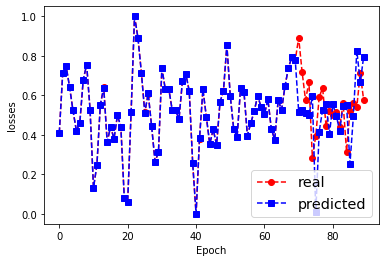

In [67]:
import matplotlib.pyplot as plt

b = np.array(predictions).shape[0]

plt.xlabel('Epoch')
plt.ylabel('losses')
plt.plot(dataY,'ro--',label='real') # 40 ~ 90
plt.plot(np.array(predictions),'bs--',label='predicted')
plt.legend(fontsize='x-large')
plt.show()